# COVID-19 Reopening / Recovery Indicators 

* [Federal Gating Criteria](https://www.whitehouse.gov/wp-content/uploads/2020/04/Guidelines-for-Opening-Up-America-Again.pdf)
* [State Gating Criteria](https://covid19.ca.gov/roadmap-counties/)
* [WHO Testing and Positivity Rate Guidelines](https://coronavirus.jhu.edu/testing/testing-positivity)
* More [background articles](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/reopening-sources.md)
* NY, Chicago, LA, and CA indicators [provided in our GitHub](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/Reopening_Indicators_Comparison.xlsx) 

This notebook gives helpful hints for working with our COVID-19 data in Jupyter Notebooks. It covers:
* How to import CSVs hosted on ESRI
* How to use functions `utils.py` to get grab the charts for any US county, state, or MSA.

**This notebook needs to be updated...datetime issues with subsetting, only works for 4/15/20 and onward, regardless of what date (string) is put in.**

In [1]:
import pandas as pd
import utils

## Import data from ESRI CSV
The [README](https://github.com/CityOfLosAngeles/aqueduct/blob/master/dags/public-health/covid19/README.md#helpful-hints) gave some helpful hints for how to read in CSVs that are hosted by ESRI.

In [ ]:
US_COUNTY_URL = "http://lahub.maps.arcgis.com/sharing/rest/content/items/782ca660304a4bdda1cc9757a2504647/data"
CROSSWALK_URL = (
    "https://raw.githubusercontent.com/CityOfLosAngeles/aqueduct/master/dags/public-health/covid19/"
    "msa_county_pop_crosswalk.csv"
)

In [ ]:
df = pd.read_csv(US_COUNTY_URL, dtype={"fips": "str"})
df.head(2)

In [ ]:
crosswalk = pd.read_csv(CROSSWALK_URL)
crosswalk.head(2)

## County indicators for cases and deaths
* Uses the `county_case_charts` function within `utils`
* 7-day rolling average shown for new cases
* 7-day rolling average shown for new deaths 

The function takes `COUNTY INFORMATION` as a string and `START_DATE` as a datetime variable, and returns the charts and the dataframe used to create the chart.

`COUNTY_INFORMATION` takes form of {COUNTY_NAME, STATE_NAME} or {5-digit county FIPS code}:
* {COUNTY_NAME}: with our without " County" e.g. "Alameda County" or "Alameda"
* {STATE_NAME}: full state name or state abbreviation e.g. "California" or "CA"
* {5-DIGIT COUNTY FIPS CODE}: a [list of county FIPS found here.](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697) e.g. "06075" for San Francisco

`START_DATE` takes form of M/D/YY
* M: 1-12
* D: 1-31
* YY: last 2 digits of year

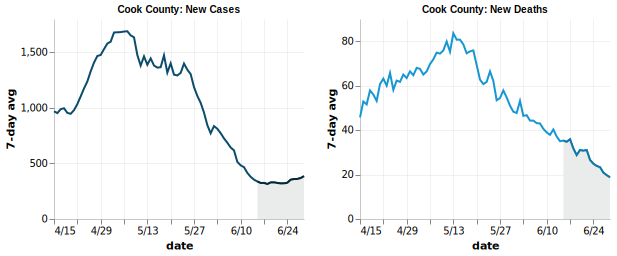

,county,state,state_abbrev,fips,date,Lat,Lon,cases,deaths,new_cases,new_deaths,cases_avg7,deaths_avg3,deaths_avg7,date2
83,Cook,Illinois,IL,17031.0,2020-04-15,41.841448,-87.816588,17306,630,983,53,969.428571,48.333333,45.714286,2020-04-15
84,Cook,Illinois,IL,17031.0,2020-04-16,41.841448,-87.816588,18087,722,781,92,953.142857,59.666667,52.857143,2020-04-16
85,Cook,Illinois,IL,17031.0,2020-04-17,41.841448,-87.816588,19391,760,1304,38,988.428571,61.000000,51.571429,2020-04-17
86,Cook,Illinois,IL,17031.0,2020-04-18,41.841448,-87.816588,20395,860,1004,100,996.857143,76.666667,57.857143,2020-04-18
87,Cook,Illinois,IL,17031.0,2020-04-19,41.841448,-87.816588,21272,877,877,17,955.285714,51.666667,56.000000,2020-04-19


In [2]:
cook = utils.county_case_charts("Cook, Illinois", "4/15/20")
cook.head()

Other acceptable examples are:
```
dallas = utils.county_case_charts("Dallas, TX", "3/15/20")
atlanta = utils.county_case_charts("Fulton, Georgia", "3/15/20")
```

## State indicators for cases and deaths
* Uses the `state_case_charts` function within `utils`
* 7-day rolling average shown for new cases
* 7-day rolling average shown for new deaths 

The function takes `STATE_INFORMATION` and `START_DATE` as strings, and returns the charts and the dataframe used to create the chart.

`STATE_INFORMATION` takes form of {STATE_NAME}:
* {STATE_NAME}: full state name or state abbreviation e.g. "California" or "CA"

In [ ]:
ny = utils.state_case_charts("New York", "4/1/20")
ny.head()

Other acceptable examples are:
```
tn = utils.state_case_charts("Tennessee", "2/15/20")
```

## MSA indicators for cases and deaths
* Uses the `msa_case_charts` function within `utils`
* 7-day rolling average shown for new cases
* 7-day rolling average shown for new deaths 

The function takes `METROPOLITAN_INFORMATION` and `START_DATE` as strings, and returns the charts and the dataframe used to create the chart. [Our crosswalk makes this information available.](https://github.com/CityOfLosAngeles/aqueduct/blob/master/dags/public-health/covid19/msa_county_pop_crosswalk.csv) 

`METROPOLITAN_INFORMATION` takes form of {CBSA NAME} or {CBSA CODE}:
* {CBSA NAME}: full metropolitan area name or any subset of it e.g. "Boston-Cambridge-Newton, MA-NH" or "Boston-Cambridge"
* {CBSA CODE}: e.g. "14460" for Boston-Cambridge-Newton, MA-NH or "31080" for Los Angeles-Long Beach-Anaheim, CA

In [ ]:
boston_msa = utils.msa_case_charts("Boston-Cambridge", "3/1/20")
boston_msa.head()

Other acceptable examples are:
```
dfw = utils.msa_case_charts("19100", "4/15/20")
durham = utils.msa_case_charts("Durham-Chapel Hill", "4/1/20")
```

### References:
<br>US_COUNTY_URL = " US_COUNTY_URL = "http://lahub.maps.arcgis.com/sharing/rest/content/items/782ca660304a4bdda1cc9757a2504647/data "


To convert to HTML, use this command in the terminal: 
`jupyter nbconvert --to html --no-input --no-prompt my-notebook.ipynb`